# <div style="text-align:center"> DS7333 - Case Study 4 | Cherry Blossom Run</div>
### <div style="text-align:center">Andy Ho, An Nguyen, Jodi Pafford</div>
<div style="text-align:center">June 3, 2019</div>

## 1 Introduction



This case study will answer Question 7 in Chapter 2 of "Data Science in R: A Case Studies Approach to Computational REasoning and Problem Solving" (Nolan and Lang). 

Question 7 is: "Follow the approach developed in Section 2.2 to read the files for the female runners and then process them using the functions in Section 2.3 to create a data frame for analysis. You may need to generalize the createDF() and extractVariables() functions to handle additional oddities in the raw text files."

The data was extracted, cleaned, reformatted and prepared for analysis. Once the data was prepared, we performed some initial analysis to prepare for future work.

## 2 Background



The Cherry Blossom Race occurs every spring in Washington, D.C. The race consists of a 10 Mile Run, 5K Run-Walk, and Kids' Run. Searchable race results are available from 1973-2018, however races since 1999 are available for download. This case study will explore results data from the 1999 through 2012 races for female runners. Data was scraped from the race website, www.cherryblossom.org. 

## 3 Methods



As described in Chapter 2 of Nolan and Lang, the data files needed to be cleaned before processing, however the first step was obtaining the files from the website. Using 2.2 as our guide, we read the tables of the race results into R. Upon intial investigation it was noted that many of the race result files had slightly different formats. Some race results also contained more columns of data than others.  Furthermore, in order to get the race results of the women contestants the address needed to be modify slightly; "m" were replace with "f" where applicable, i.e. "http://www.cherryblossom.org/results/1999/cb99m.html" to "http://www.cherryblossom.org/results/1999/cb99f.html"; or "men" were replace with "women" where applicable, i.e. "http://www.cherryblossom.org/results/2006/men.htm" to "http://www.cherryblossom.org/results/2006/women.htm."

In [4]:
### Step 1 (2.2) - Reading Tables of Race Results into R
load(file="CBMenTextTables.rda")
load(file="CBWomenTextTables.rda")
ubase = "http://www.cherryblossom.org/"

menURLs = 
  c("results/1999/cb99m.html", "results/2000/Cb003m.htm", "results/2001/oof_m.html",
    "results/2002/oofm.htm", "results/2003/CB03-M.HTM",
    "results/2004/men.htm", "results/2005/CB05-M.htm", 
    "results/2006/men.htm", "results/2007/men.htm", 
    "results/2008/men.htm", "results/2009/09cucb-M.htm",
    "results/2010/2010cucb10m-m.htm", 
    "results/2011/2011cucb10m-m.htm",
    "results/2012/2012cucb10m-m.htm")

womenURLs = 
  c("results/1999/cb99f.html", "results/2000/Cb003f.htm", "results/2001/oof_f.html",
    "results/2002/ooff.htm", "results/2003/CB03-F.HTM",
    "results/2004/women.htm", "results/2005/CB05-F.htm", 
    "results/2006/women.htm", "results/2007/women.htm", 
    "results/2008/women.htm", "results/2009/09cucb-F.htm",
    "results/2010/2010cucb10m-f.htm", 
    "results/2011/2011cucb10m-f.htm",
    "results/2012/2012cucb10m-f.htm")

urlsMen = paste(ubase, menURLs, sep = "")
urlsWomen = paste(ubase, womenURLs, sep = "")

print("The urls for the men's race results are:")
for (i in 1:14){
    print(paste(urlsMen[i], " with ", length(menTables[[i]]), " entries from ", names(menTables[i]), ".", sep=""))
}
print("")
print("The urls for the women's race results are:")
for (i in 1:14){
    print(paste(urlsWomen[i], " with ", length(womenTables[[i]]), " entries from ", names(menTables[i]), ".", sep=""))
}

[1] "The urls for the men's race results are:"
[1] "http://www.cherryblossom.org/results/1999/cb99m.html with 3193 entries from 1999."
[1] "http://www.cherryblossom.org/results/2000/Cb003m.htm with 3019 entries from 2000."
[1] "http://www.cherryblossom.org/results/2001/oof_m.html with 3627 entries from 2001."
[1] "http://www.cherryblossom.org/results/2002/oofm.htm with 3727 entries from 2002."
[1] "http://www.cherryblossom.org/results/2003/CB03-M.HTM with 3951 entries from 2003."
[1] "http://www.cherryblossom.org/results/2004/men.htm with 4164 entries from 2004."
[1] "http://www.cherryblossom.org/results/2005/CB05-M.htm with 4335 entries from 2005."
[1] "http://www.cherryblossom.org/results/2006/men.htm with 5245 entries from 2006."
[1] "http://www.cherryblossom.org/results/2007/men.htm with 5283 entries from 2007."
[1] "http://www.cherryblossom.org/results/2008/men.htm with 5913 entries from 2008."
[1] "http://www.cherryblossom.org/results/2009/09cucb-M.htm with 6659 entries from 2009

After all data was successfully pulled from the website, the next step was to clean and reformat the data. The cleaning included the addition of a condition in the "extracVariables" function to remove any footnotes and blank lines in the body of the table, footnotes began with a "#" or "*" symbol.  The symbols indicating that there is a footnote always follow the "net, gun or time" time, we added a code that replaces this symbol with a blank space whenever it appers in the "createDF" function.  Also, there for the results of 2006 for both men and wommen the contestant's hometown and net run time did not separate due to the "===" separator in not contained a space to indicate that the two variables are different.  To rememdy this we added a code that replaces all numeric and ":" values that are found in the "home" column and all letters in the "net" column with a space.  Following that, all data was combined into one large file with all race data.

In [5]:
### Step 2 (2.3) - Data Cleaning and Reformatting Variable
load(file="cbMen.rda")
load(file="cbWomen.rda")

for (y in 1999:2012){
    print(paste(y, " Men (", nrow(cbMen[(cbMen$year==y),]), " entries):", sep=""))
    print(summary(cbMen[(cbMen$year==y),5:6]))
    print(paste(y, " Women (", nrow(cbWomen[(cbWomen$year==y),]), " entries):", sep=""))
    print(summary(cbWomen[(cbWomen$year==y),5:6]))
}

[1] "1999 Men (3190 entries):"
      age           runTime      
 Min.   :11.00   Min.   : 46.98  
 1st Qu.:32.00   1st Qu.: 74.80  
 Median :40.00   Median : 84.28  
 Mean   :40.34   Mean   : 84.33  
 3rd Qu.:48.00   3rd Qu.: 93.08  
 Max.   :80.00   Max.   :170.83  
 NA's   :1                       
[1] "1999 Women (2356 entries):"
      age          runTime      
 Min.   :12.0   Min.   : 53.62  
 1st Qu.:28.0   1st Qu.: 87.18  
 Median :33.0   Median : 95.16  
 Mean   :34.9   Mean   : 95.50  
 3rd Qu.:41.0   3rd Qu.:103.85  
 Max.   :81.0   Max.   :165.30  
 NA's   :4                      
[1] "2000 Men (3016 entries):"
      age           runTime      
 Min.   :11.00   Min.   : 46.10  
 1st Qu.:32.00   1st Qu.: 74.77  
 Median :40.00   Median : 83.22  
 Mean   :40.41   Mean   : 83.61  
 3rd Qu.:48.00   3rd Qu.: 92.15  
 Max.   :79.00   Max.   :155.18  
[1] "2000 Women (2166 entries):"
      age           runTime      
 Min.   :14.00   Min.   : 55.83  
 1st Qu.:29.00   1st Qu.: 85.7

The last step was to perform some basic exploritory data analysis in order to ensure that all data was pulled successfully and to investigate next steps.

## 4 Results



## ** Add header(20) for one of the cleaned DFs.

##### Final Combined File of Women Race Times - 1999-2012
![title](WomenFinalTXT.png)

## 5 Conclusion
 

Properly scrapping the data from web pages and extracting from raw format to a standardized data set is critical to the success of exploratory and data analysis. One of the big lessons for this chapter is the notion of “garbage in, garbage out.” Specifically, in the case of QTW, web scrapping to form data sets is a difficult task. One can safely assume a website’s pages can very well be in different formats, have different seperators, and/or different feature names. For this this task, there were race results for males and females from 1999-2012 - with some of the results for each gender and year in mismatching format. To insure there was no garbage going into the data set, we had to first scrap all the race results as RDA file, then subset each year’s results into a data frame to create a text file for each year. From there, we were able to view each text file for differences in structure, feature names, values, etc... The rest of the exercise was to finalize a standard for all the results to load as data frame in order to perform exploratory data analysis.

### References
+ Nolan, D. and Lang, D. T. “Data Science in R.” CRC Press, 2015 (Chapter 1)
+ http://rdatasciencecases.org/
+ https://rstudio-pubs-static.s3.amazonaws.com/351788_b8d5de284dd645a1b920b7bd77e0967b.html

## 6 Appendix - Code


### 6.1 Process RAW Data

In [6]:
ubase = "http://www.cherryblossom.org/"

menURLs = 
  c("results/1999/cb99m.html", "results/2000/Cb003m.htm", "results/2001/oof_m.html",
    "results/2002/oofm.htm", "results/2003/CB03-M.HTM",
    "results/2004/men.htm", "results/2005/CB05-M.htm", 
    "results/2006/men.htm", "results/2007/men.htm", 
    "results/2008/men.htm", "results/2009/09cucb-M.htm",
    "results/2010/2010cucb10m-m.htm", 
    "results/2011/2011cucb10m-m.htm",
    "results/2012/2012cucb10m-m.htm")

womenURLs = 
  c("results/1999/cb99f.html", "results/2000/Cb003f.htm", "results/2001/oof_f.html",
    "results/2002/ooff.htm", "results/2003/CB03-F.HTM",
    "results/2004/women.htm", "results/2005/CB05-F.htm", 
    "results/2006/women.htm", "results/2007/women.htm", 
    "results/2008/women.htm", "results/2009/09cucb-F.htm",
    "results/2010/2010cucb10m-f.htm", 
    "results/2011/2011cucb10m-f.htm",
    "results/2012/2012cucb10m-f.htm")

urlsMen = paste(ubase, menURLs, sep = "")
urlsWomen = paste(ubase, womenURLs, sep = "")

In [7]:
library(XML)

extractResTable =
  #
  # Retrieve data from web site, 
  # find the preformatted text,
  # and write lines or return as a character vector.
  #
  function(url = "http://www.cherryblossom.org/results/1999/cb99m.html",
           year = 1999, sex = "male", file = NULL)
  {
    #added encoding for windows users who get an "A" symbol
    doc = htmlParse(url, encoding="UTF-8")

    if (year == 2000) {
      # Get preformatted text from 4th font element
      # The top file is ill formed so the <pre> search doesn't work.
      ff = getNodeSet(doc, "//font")
      txt = xmlValue(ff[[4]])
      els = strsplit(txt, "\r\n")[[1]]
    }
    else if (year == 2009 & sex == "male") {
      # Get preformatted text from <div class="Section1"> element
      # Each line of results is in a <pre> element
      div1 = getNodeSet(doc, "//div[@class='Section1']")
      pres = getNodeSet(div1[[1]], "//pre")
      els = sapply(pres, xmlValue)
    }
    else if (year == 1999){
      # Get preformatted text from <pre> elements
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\n")[[1]]   
    } 
    else {
      # Get preformatted text from <pre> elements
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\r\n")[[1]]   
    } 
    
    if (is.null(file)) return(els)
    # Write the lines as a text file.
    writeLines(els, con = file)
  }


years = 1999:2012
menTables = mapply(extractResTable, url = urlsMen, year = years)
names(menTables) = years
sapply(menTables, length)

womenTables = mapply(extractResTable, url = urlsWomen, 
                       year = years, sex = rep("female", 14))
names(womenTables) = years
sapply(womenTables, length)


save(menTables, file = "CBMenTextTables.rda")
save(womenTables, file = "CBWomenTextTables.rda")

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
3193 3019 3627 3727 3951 4164 4335 5245 5283 5913 6659 6919 7019 7201

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
2359 2169 2976 3338 3547 3907 4342 5445 5699 6405 8333 8863 9038 9738

#### Beginning of 2.2 code from the text - Reading tables into R

In [8]:
# An's code for txt files...

load(file="CBMenTextTables.rda")
load(file="CBWomenTextTables.rda")

for (year in years){
 temp <- menTables[paste(year)]
 dir.create(file.path("MenTxt"), showWarnings = FALSE)
 write.table(data.frame(temp), file=paste("MenTxt/", year, ".txt", sep=""), sep="\t", row.names=FALSE)
 temp <- womenTables[paste(year)]
 dir.create(file.path("WomenTxt"), showWarnings = FALSE)
 write.table(data.frame(temp), file=paste("WomenTxt/", year, ".txt", sep=""), sep="\t", row.names=FALSE)
}

In [9]:
findColLocs = function(spacerRow) {

  spaceLocs = gregexpr(" ", spacerRow)[[1]]
  rowLength = nchar(spacerRow)

  if (substring(spacerRow, rowLength, rowLength) != " ")
    return( c(0, spaceLocs, rowLength + 1))
  else return(c(0, spaceLocs))
}

selectCols = 
function(colNames, headerRow, searchLocs) 
{
  sapply(colNames, 
         function(name, headerRow, searchLocs)
         {
           startPos = regexpr(name, headerRow)[[1]]
           if (startPos == -1) 
             return( c(NA, NA) )
    
           index = sum(startPos >= searchLocs)
           c(searchLocs[index] + 1, searchLocs[index + 1])
         },
         headerRow = headerRow, searchLocs = searchLocs )
}

In [10]:
#First pass at function with women added yielded errors. Based on textbook,
#we need to edit the women 2001 file so that it has the "==" line.

extractVariables = 
  function(file, varNames =c("name", "home", "ag", "gun",
                             "net", "time"))
{
       # Find the index of the row with =s
  eqIndex = grep("\"=====", file)
       # Extract the two key rows and the data
  spacerRow = file[eqIndex] 
  headerRow = tolower(file[ eqIndex - 1 ])
  body = file[ -(1 : eqIndex) ]
      
         # Remove footnotes and blank rows
  footnotes = grep("^\"[[:blank:]]*(\\*|\\#)", body)
  if ( length(footnotes) > 0 ) body = body[ -footnotes ]
  blanks = grep("^\"[[:blank:]]*\"$", body)
  if (length(blanks) > 0 ) body = body[ -blanks ]
       
       # Obtain the starting and ending positions of variables
  searchLocs = findColLocs(spacerRow)
  locCols = selectCols(varNames, headerRow, searchLocs)

  Values = mapply(substr, list(body), start = locCols[1, ], 
                  stop = locCols[2, ])
  colnames(Values) = varNames
  
  invisible(Values)
}

mfilenames = paste("MenTxt/", 1999:2012, ".txt", sep = "")
menFiles = lapply(mfilenames, readLines)
names(menFiles) = 1999:2012

wfilenames = paste("WomenTxt/", 1999:2012, ".txt", sep = "")
womenFiles = lapply(wfilenames, readLines)
names(womenFiles) = 1999:2012
womenFiles[['2001']][3:4] = menFiles[['2001']][5:6]

menResMat = lapply(menFiles, extractVariables)

womenResMat = lapply(womenFiles, extractVariables)


In [11]:
#sanitycheck

sapply(menResMat, nrow)
sapply(womenResMat, nrow)

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
3190 3016 3561 3723 3946 4156 4324 5235 5274 5905 6649 6909 7011 7193

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
2356 2166 2972 3334 3542 3899 4333 5435 5690 6397 8323 8853 9030 9730

### 2.3 creating data frames of the information.

In [12]:
convertTime = function(time) {
  timePieces = strsplit(time, ":")
  timePieces = sapply(timePieces, as.numeric)
  sapply(timePieces, function(x) {
                      if (length(x) == 2) x[1] + x[2]/60
                      else 60*x[1] + x[2] + x[3]/60
                      })
}

createDF = function(Res, year, sex) 
{
  # Determine which time to use
  if ( !is.na(Res[1, 'net']) ) useTime = Res[ , 'net']
  else if ( !is.na(Res[1, 'gun']) ) useTime = Res[ , 'gun']
  else useTime = Res[ , 'time']
  
  # Remove # and * and blanks from time
  useTime = gsub("[#\\*\"[:blank:]]", "", useTime)
  
  
  # Drop rows with no time
  Res = Res[ useTime != "", ]
  runTime = convertTime(useTime[ useTime != "" ])
  
  Results = data.frame(year = rep(year, nrow(Res)),
                       sex = rep(sex, nrow(Res)),
                       name = Res[ , 'name'], home = Res[ , 'home'],
                       age = as.numeric(Res[, 'ag']), 
                       runTime = runTime,
                       stringsAsFactors = FALSE)
  invisible(Results)
}

In [13]:
menResMat[['2006']][,"home"] = gsub("[0-9, :]", "", menResMat[['2006']][,"home"])
menResMat[['2006']][,"net"] = gsub("[A-Za-z\\s]", "", menResMat[['2006']][,"net"])

menDF = mapply(createDF, menResMat, year = 1999:2012,
               sex = rep("M", 14), SIMPLIFY = FALSE)

Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"

In [14]:
# Women function 
womenResMat[['2006']][,"home"] = gsub("[0-9, :]", "", womenResMat[['2006']][,"home"])
womenResMat[['2006']][,"net"] = gsub("[A-Za-z\\s]", "", womenResMat[['2006']][,"net"])

womenDF = mapply(createDF, womenResMat, year = 1999:2012,
                 sex = rep("W", 14), SIMPLIFY = FALSE)

Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"

In [15]:
#combine men and women data frames into two separate dataframe and save.
cbMen = do.call(rbind, menDF)
save(cbMen, file = "cbMen.rda")
cbWomen = do.call(rbind, womenDF)
save(cbWomen, file = "cbWomen.rda")

### Exploritory Descriptive Analytics

Warning message:
"package 'ggplot2' was built under R version 3.4.4"

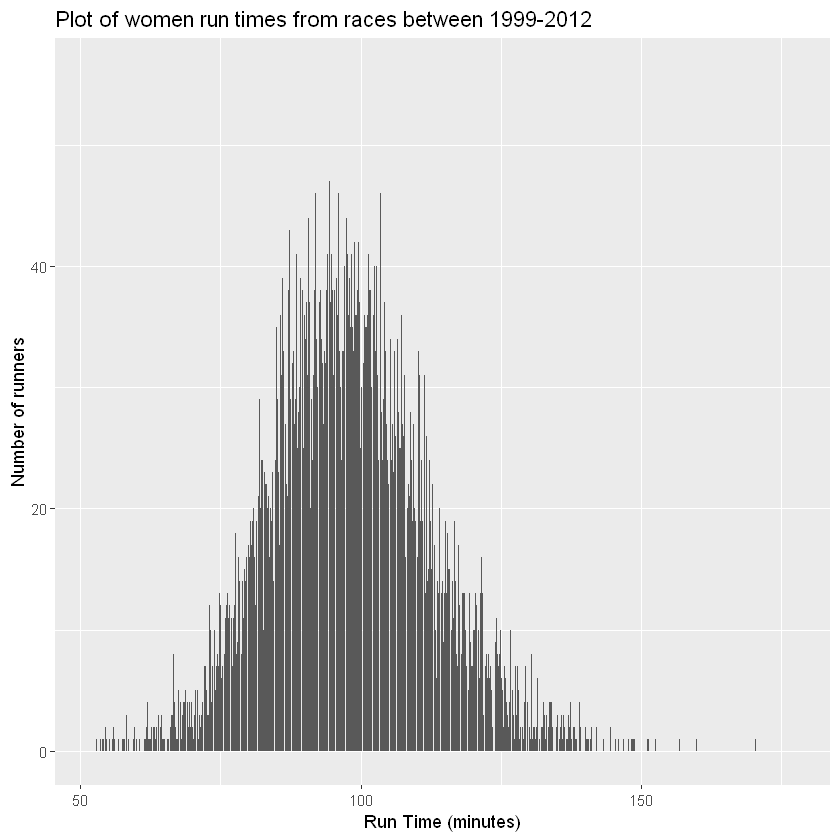

In [16]:
library(ggplot2)

load(file="cbMen.rda")
load(file="cbWomen.rda")

#General look at the data to check data elements to cofirm initial accuracy

ggplot(data = cbWomen) + geom_bar(mapping = aes(x=runTime)) + ggtitle("Plot of women run times from races between 1999-2012") +
  xlab("Run Time (minutes)") + ylab("Number of runners")

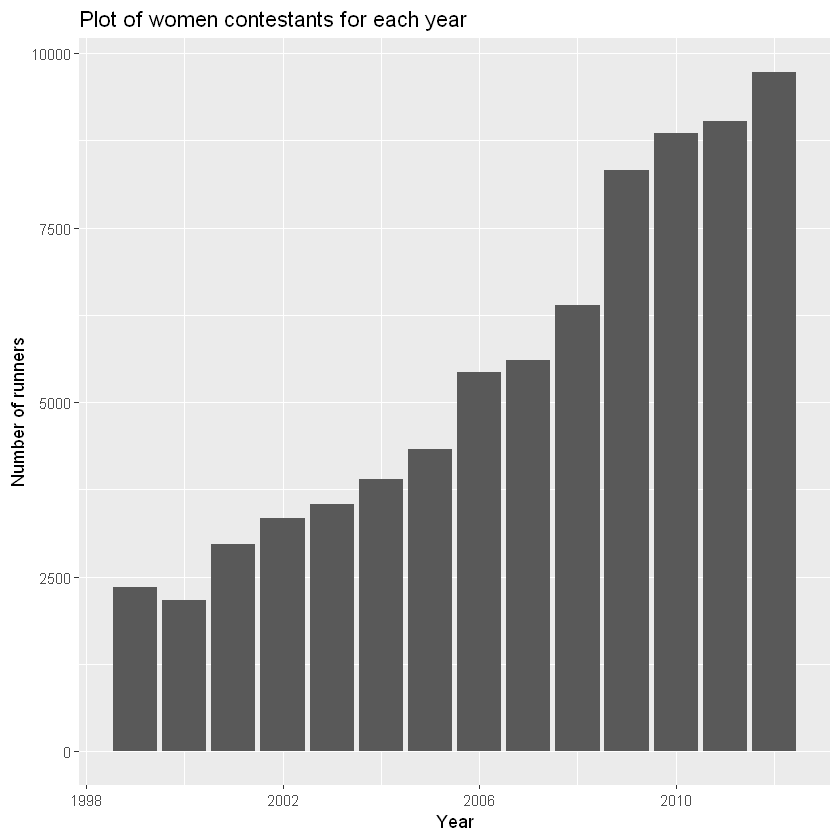

In [17]:
ggplot(data = cbWomen) + geom_bar(mapping = aes(x=year)) + ggtitle("Plot of women contestants for each year") +
  xlab("Year") + ylab("Number of runners")

Warning message:
"Removed 22 rows containing non-finite values (stat_count)."

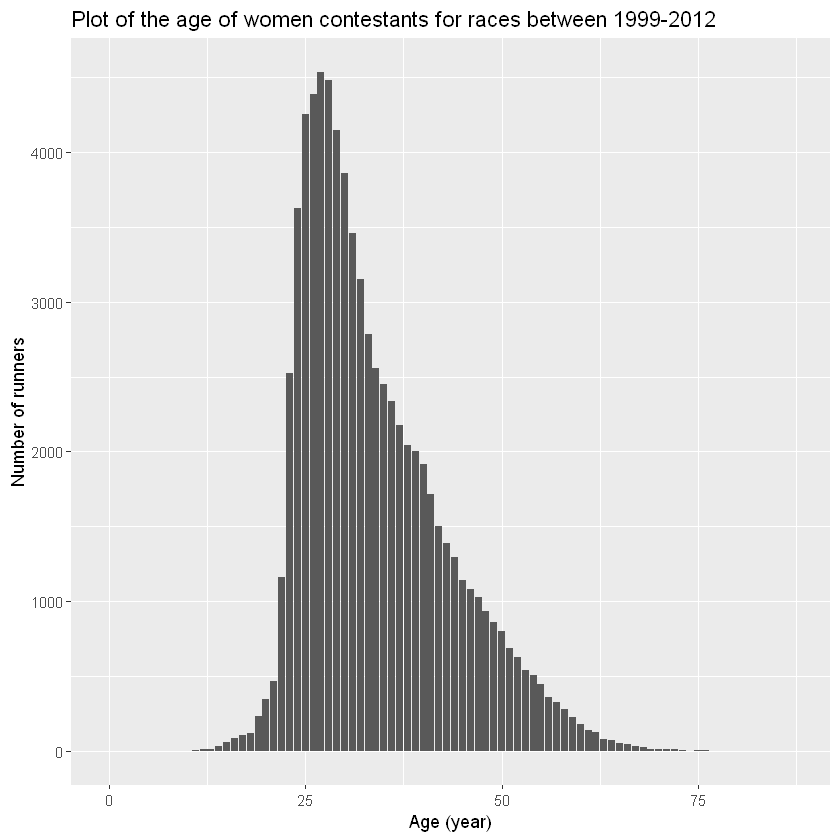

In [18]:
ggplot(data = cbWomen) + geom_bar(mapping = aes(x=age)) + ggtitle("Plot of the age of women contestants for races between 1999-2012") +
  xlab("Age (year)") + ylab("Number of runners")

Warning message:
"package 'tidyverse' was built under R version 3.4.4"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.2     v purrr   0.3.2
v tidyr   0.8.0     v dplyr   0.8.1
v readr   1.1.1     v stringr 1.3.0
v tibble  2.1.2     v forcats 0.3.0
Warning message:
"package 'tidyr' was built under R version 3.4.4"Warning message:
"package 'readr' was built under R version 3.4.4"Warning message:
"package 'purrr' was built under R version 3.4.4"Warning message:
"package 'stringr' was built under R version 3.4.4"Warning message:
"package 'forcats' was built under R version 3.4.4"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


year,ageMean,ageMedian,count
<fct>,<dbl>,<dbl>,<int>
1999,34.90094,33,2356
2000,35.55355,34,2166
2001,34.80619,33,2972
2002,35.13784,33,3334
2003,35.05138,33,3542
2004,33.93255,32,3899
2005,34.16925,32,4333
2006,33.65348,31,5435
2007,33.46786,31,5602


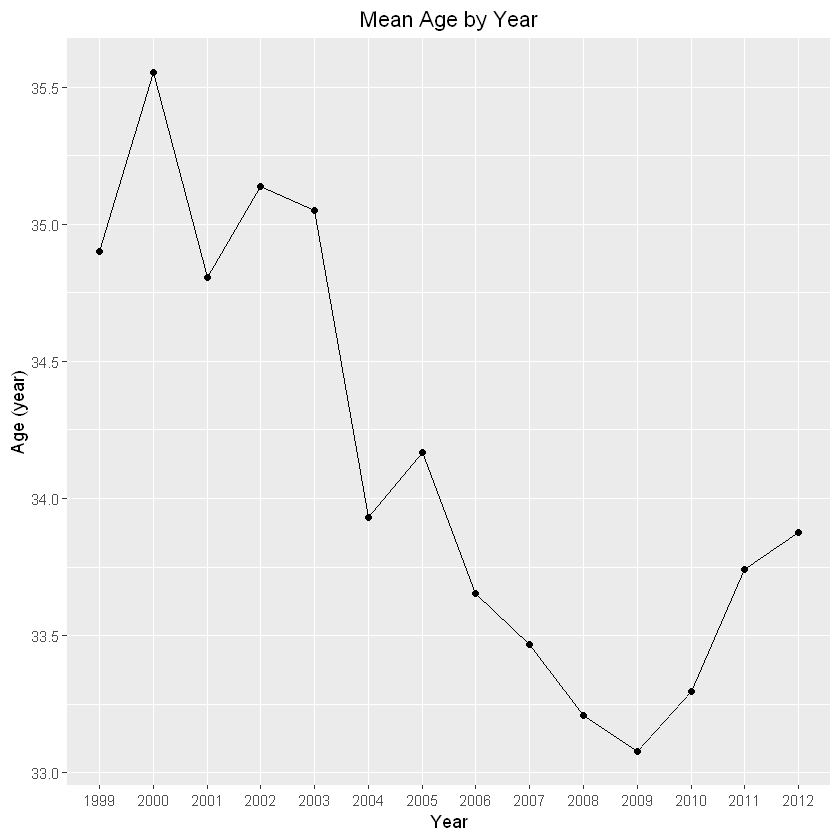

In [19]:
library (tidyverse)

#Exploring Age by Year
#Summary table and dot plot (Year, Mean and Median Age, Count)
#table
cbWomen$year = as.factor(cbWomen$year)
ages = group_by(cbWomen, year)
ageSummary = summarize(ages, ageMean = mean(age, na.rm = TRUE),ageMedian = median(age, na.rm = TRUE), count=n())
ageSummary
#dot plot
ggplot(ageSummary, aes(x=year, y=ageMean, group=1)) +
  geom_line() +
  geom_point() + 
  ggtitle("Mean Age by Year") +
  xlab("Year") +
  ylab("Age (year)") + 
  theme(plot.title = element_text(hjust = 0.5))

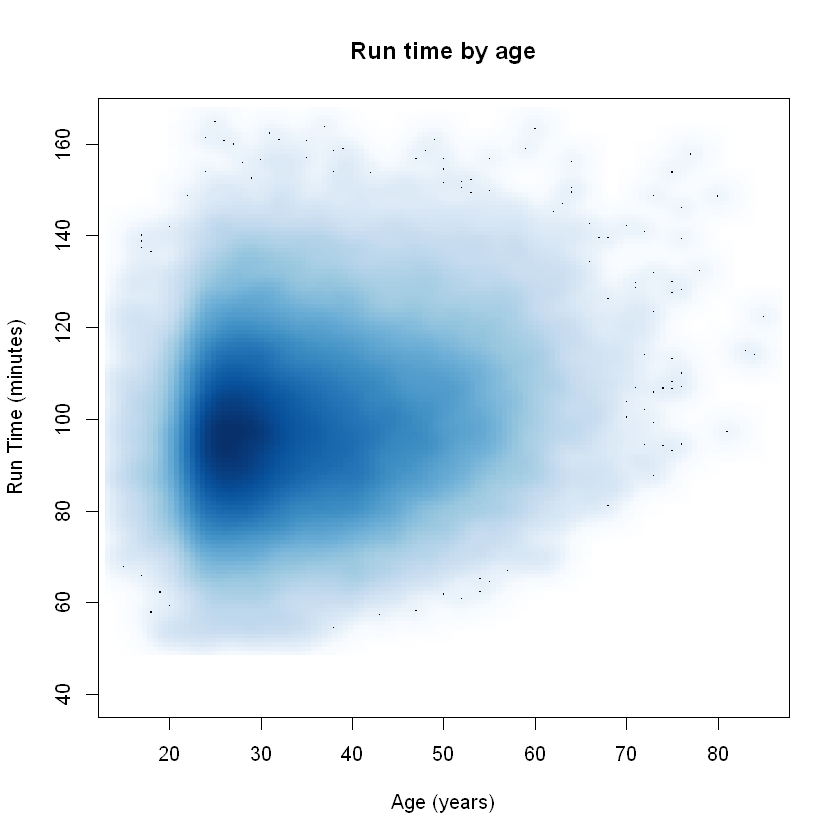

In [20]:
#Exploring age and time
smoothScatter(y = cbWomen$runTime, x = cbWomen$age, 
              ylim = c(40, 165), xlim = c(15, 85),
              xlab = "Age (years)", ylab = "Run Time (minutes)", main="Run time by age")



ageGroup
(10,20] (20,30] (30,40] (40,50] (50,60] (60,70] (70,80] (80,90] 
   1016   33442   24883   11746    4187     613      53       6 

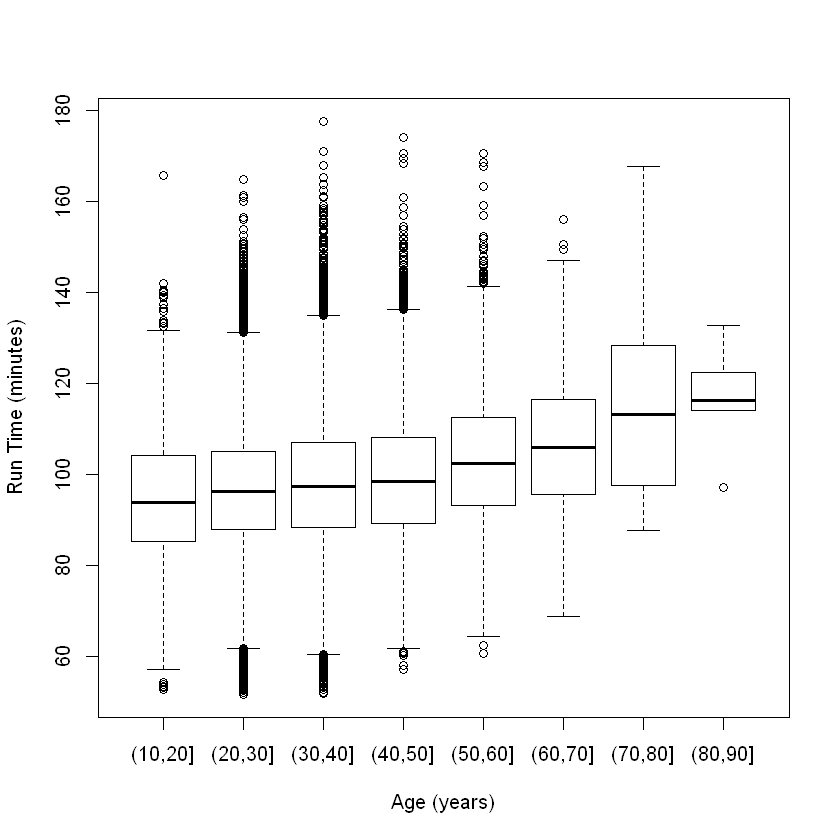

In [21]:
#Bin the ages by 10s and view boxplot of age vs runTime

cbWomenGroup <- cbWomen[cbWomen$runTime > 30 & !is.na(cbWomen$age) & cbWomen$age > 10, ]
ageGroup <- cut(cbWomenGroup$age, breaks = c(seq(10, 80, 10), 90))
table(ageGroup)

plot(cbWomenGroup$runTime ~ ageGroup, xlab = "Age (years)", ylab = "Run Time (minutes)")



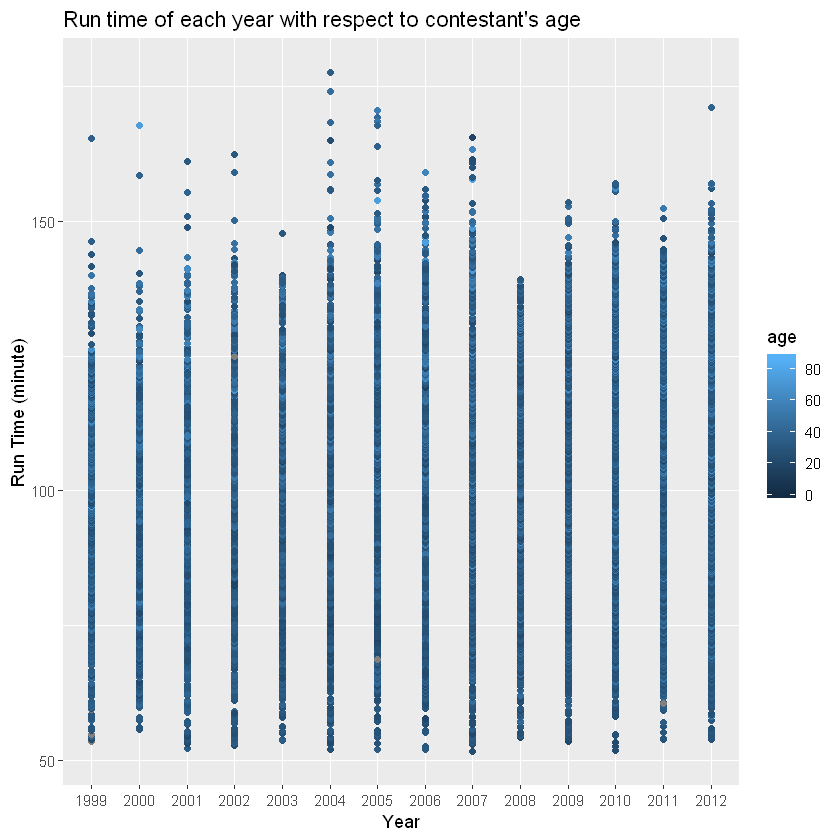

In [22]:
#Looking at most variables together
ggplot(cbWomen, aes(year, runTime, col = age)) +
  geom_point() + ggtitle("Run time of each year with respect to contestant's age") +
  xlab("Year") +
  ylab("Run Time (minute)")

In [23]:
#Linear model of runTime and age
linearAge <- lm(runTime ~ age, data = cbWomenGroup)
summary(linearAge)


Call:
lm(formula = runTime ~ age, data = cbWomenGroup)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.102  -9.450  -0.649   8.639  79.201 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 91.420458   0.194829  469.23   <2e-16 ***
age          0.197009   0.005553   35.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.11 on 75944 degrees of freedom
Multiple R-squared:  0.0163,	Adjusted R-squared:  0.01629 
F-statistic:  1259 on 1 and 75944 DF,  p-value: < 2.2e-16


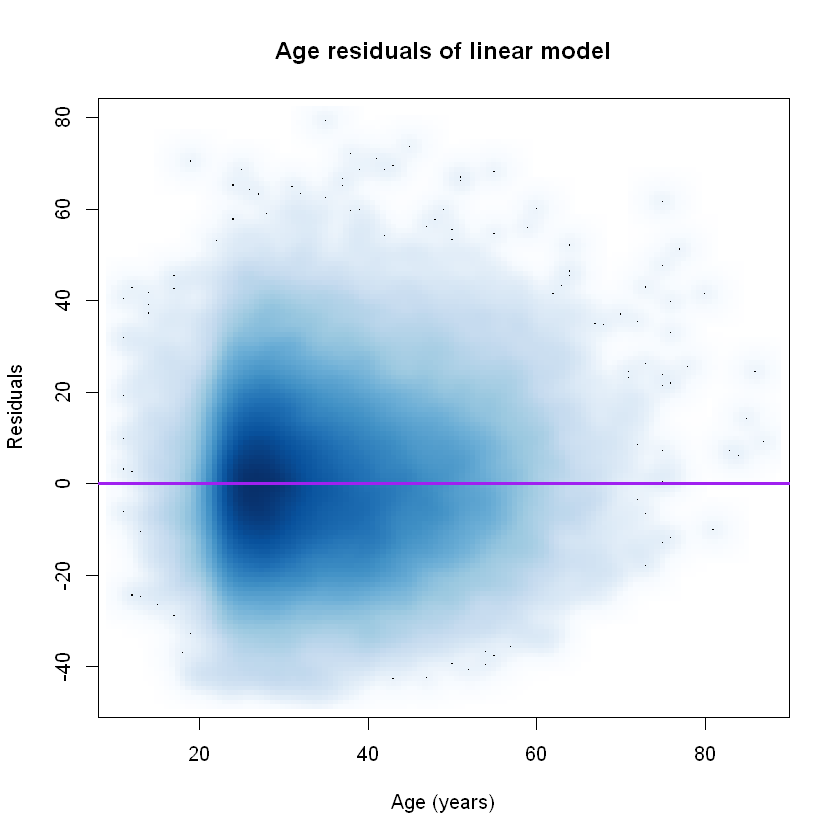

In [24]:
#plot residuals of linear model
smoothScatter(x = cbWomenGroup$age, y = linearAge$residuals, xlab = "Age (years)", ylab = "Residuals", main="Age residuals of linear model")
abline(h = 0, col = "purple", lwd = 3)